In [1800]:
import pandas as pd
datos = pd.read_csv('U4_01_housing.csv')


In [1801]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [1802]:
datos.value_counts('ocean_proximity')

# 1, 2, 3, 4, 5

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
dtype: int64

In [1803]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

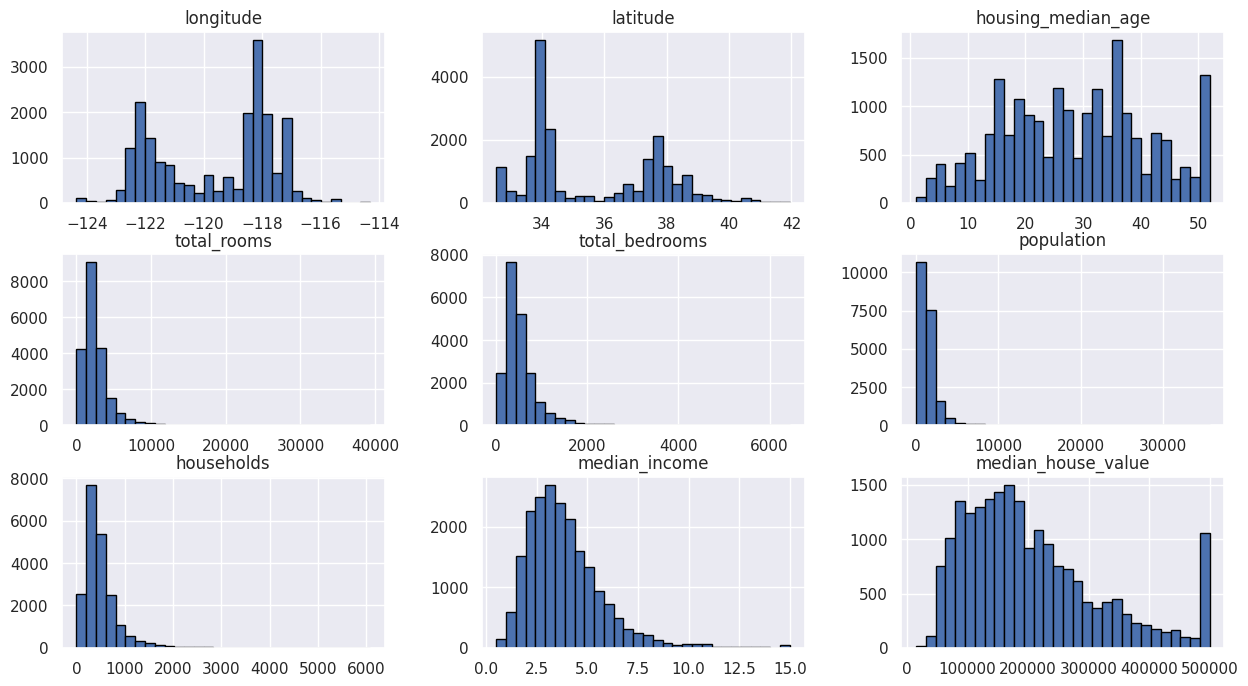

In [1804]:
# figsize: dimensiones de las figuras
# bins: cambiar el # de columnas en el histograma
# edgecolor: aplica un color al borde

datos.hist( figsize=(15,8), bins=30, edgecolor = 'black' ) # represanta la informacion en histogramas

In [1805]:
datos_na = datos.dropna() # eliminar los registros nulos

In [1806]:
datos_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


<Axes: xlabel='latitude', ylabel='longitude'>

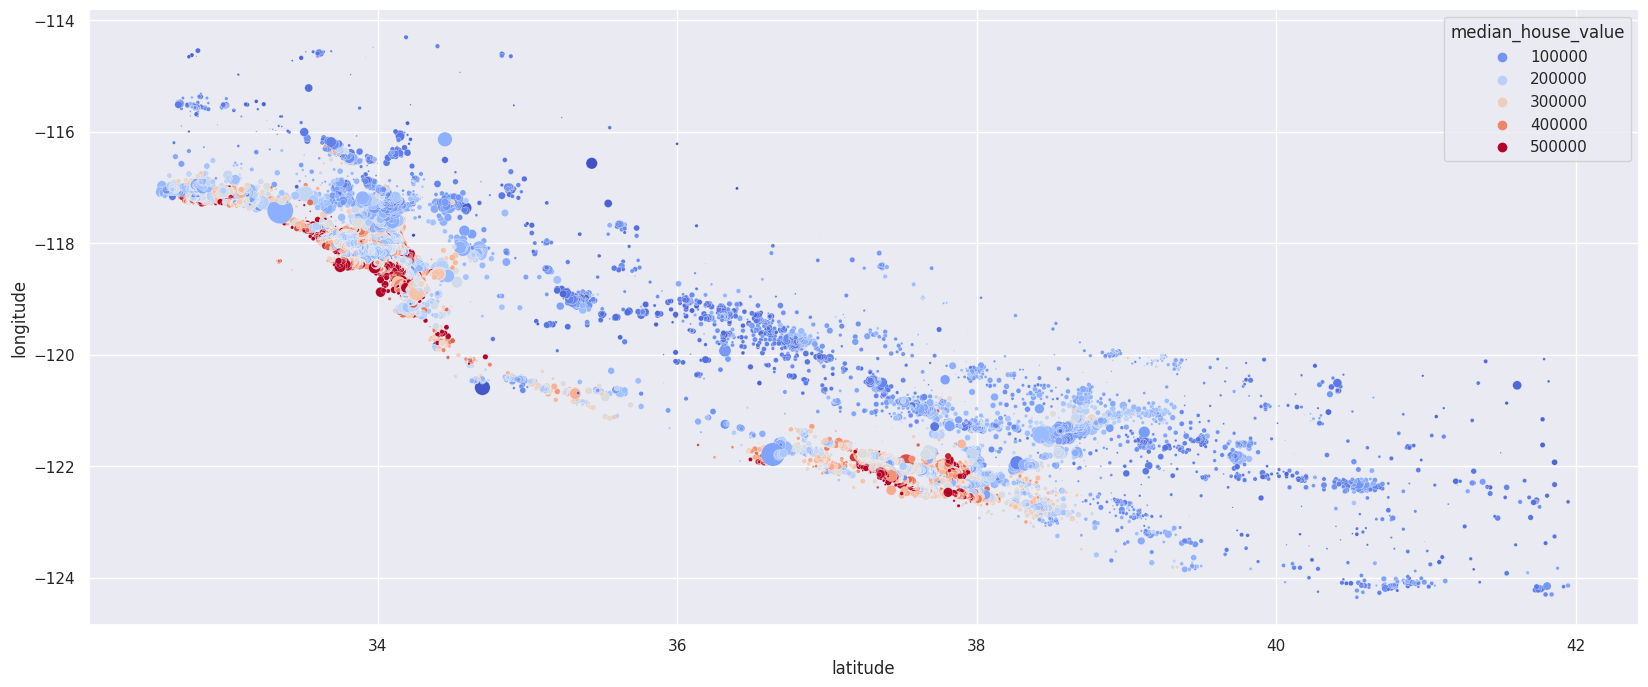

In [1807]:
# graficar los datos
import seaborn as sb

sb.scatterplot(x='latitude', y='longitude', data=datos_na, hue='median_house_value', s=datos_na['population']/100, palette='coolwarm')

<Axes: xlabel='latitude', ylabel='longitude'>

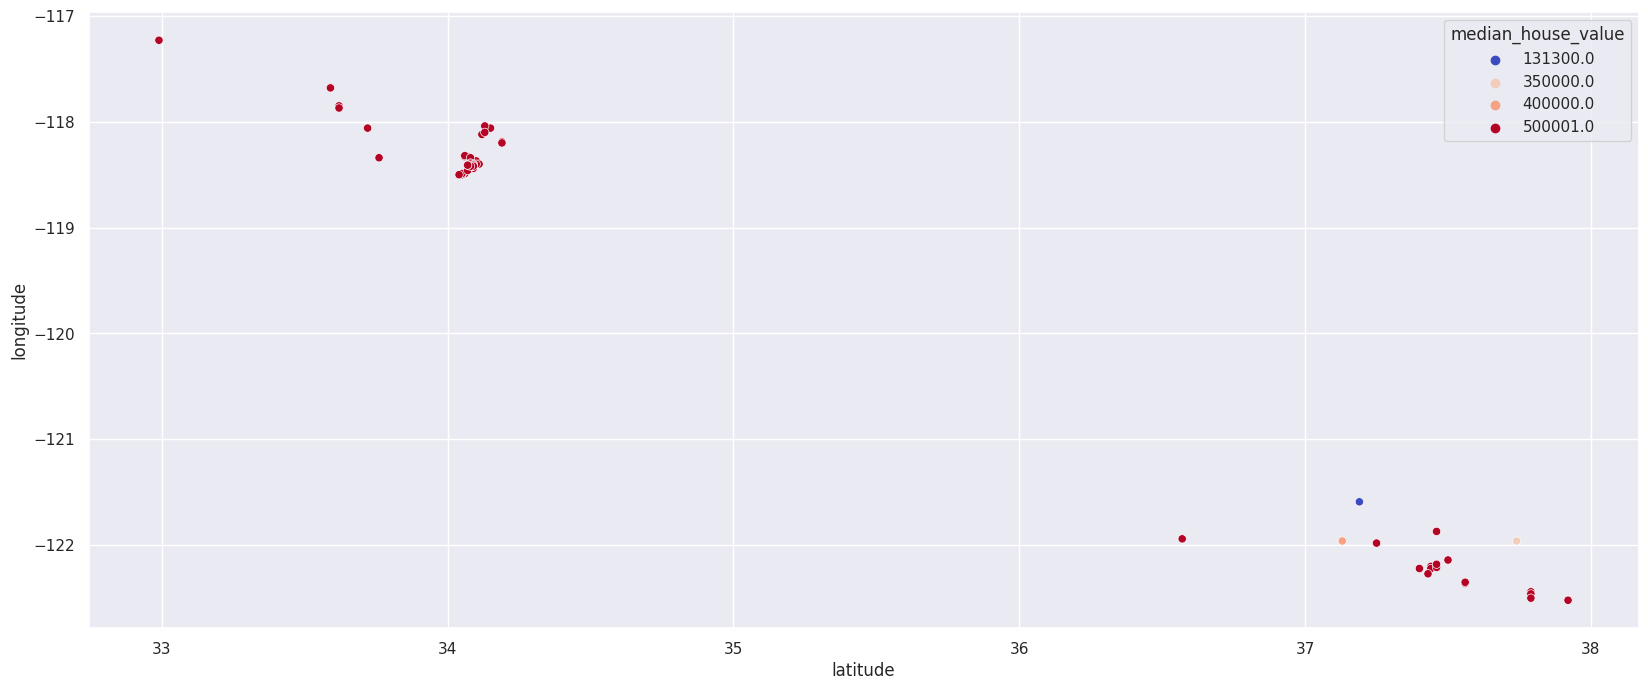

In [1808]:
sb.scatterplot(x='latitude', y='longitude', data=datos_na[datos_na.median_income > 14], hue='median_house_value', palette='coolwarm')

In [1809]:
# Dummies

# 1, 2, 3, 4, 5
#   NEAR BAY    INLAND    ISLAND
#       1         0          0
#       0         0          1

dummies = pd.get_dummies(datos_na['ocean_proximity'], dtype=int)


In [1810]:
#union de los dummies al dataframe
datos_na = datos_na.join(dummies)

In [1811]:
#eliminar la columna que no necesito
datos_na = datos_na.drop(['ocean_proximity'], axis=1)

In [1812]:
datos_na.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

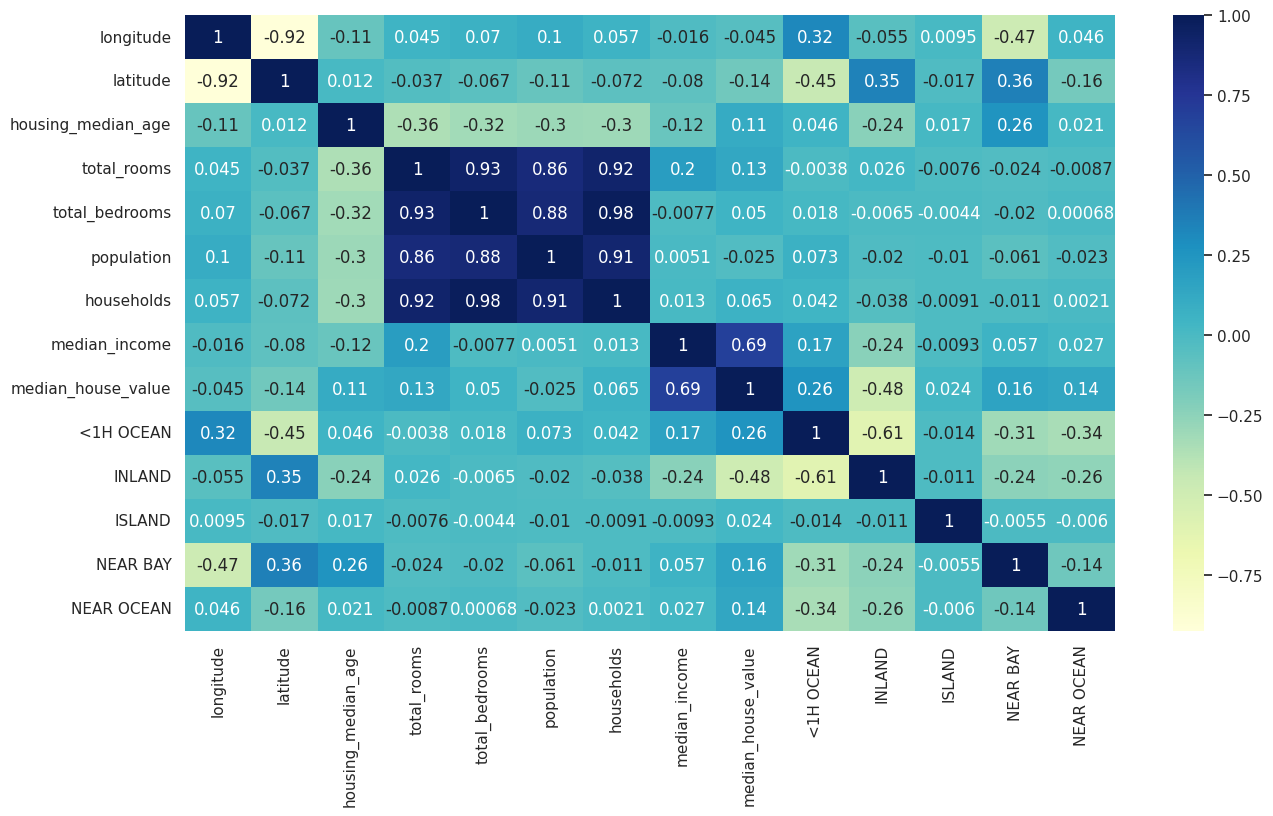

In [1813]:
#diagrama de correlaciones

sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data=datos_na.corr(), annot=True, cmap='YlGnBu' )

In [1814]:
#valores correlacionados del median_house_value

datos.corr()['median_house_value'].sort_values(ascending=False)

<ipython-input-1814-4a987637d184>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.corr()['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='median_income'>

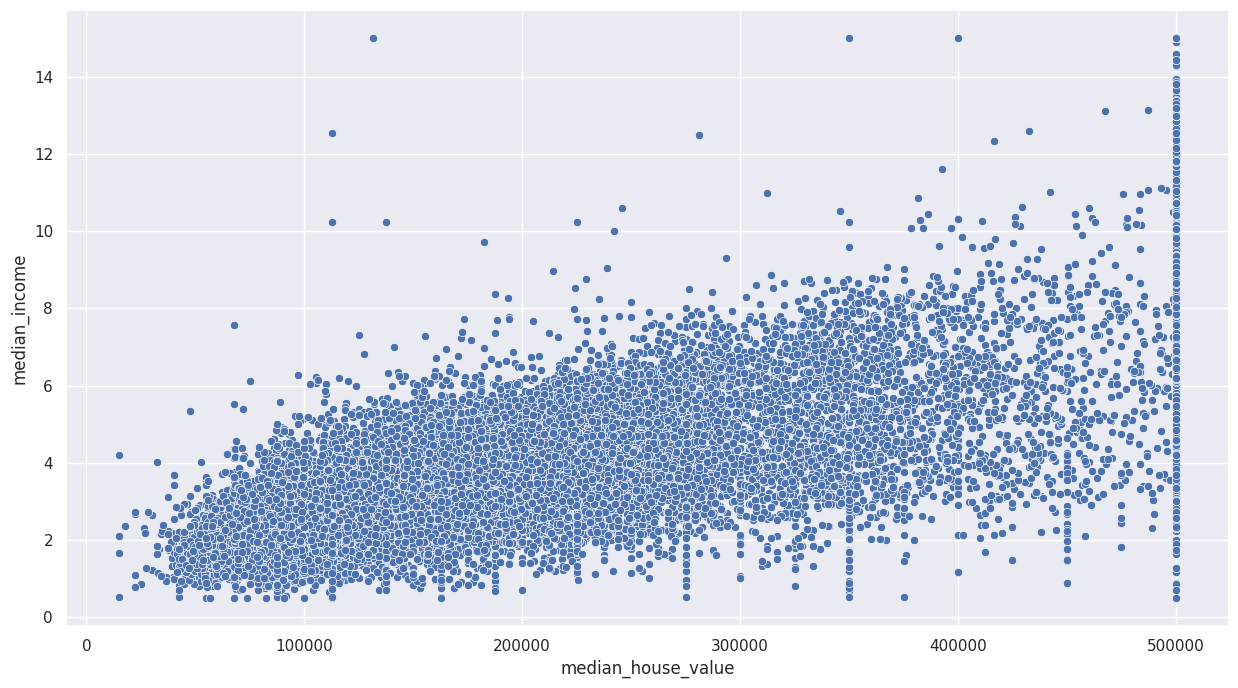

In [1815]:
# grafica de relacion entre el valor de la casa y los ingresos

sb.scatterplot(x=datos_na['median_house_value'], y=datos_na['median_income'])



In [1816]:
datos_na.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


In [1817]:
datos_na

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [1818]:
#agregar caracteristica de ratio de habitaciones de dormir

datos_na['room_ratio'] = datos_na['total_bedrooms'] /  datos_na['total_rooms']



############################################################ cambios empiezan agregados aqui#########################################################################
############################################################ cambios empiezan agregados aqui#########################################################################
#caracteristicas nuevas creadas para poder mejorer el score

#datos_na['people_per_house'] =  datos_na['population'] / datos_na['households']
# datos_na['houses_per_person'] =  datos_na['households'] / datos_na['population']
datos_na['avg_rooms_per_household'] =   datos_na['total_rooms']/datos_na['households']
datos_na['bedrooms_per_person'] =   datos_na['total_bedrooms']/datos_na['population']
datos_na['rooms_per_person'] =   datos_na['total_rooms']/datos_na['population']
datos_na['median_room_value'] =  datos_na['median_house_value'] / datos_na['avg_rooms_per_household']  #ESTA RESULTO SER LA CARACTERISTICA CLAVE!


############################################################ cambios agregados terminan aqui#########################################################################

<Axes: >

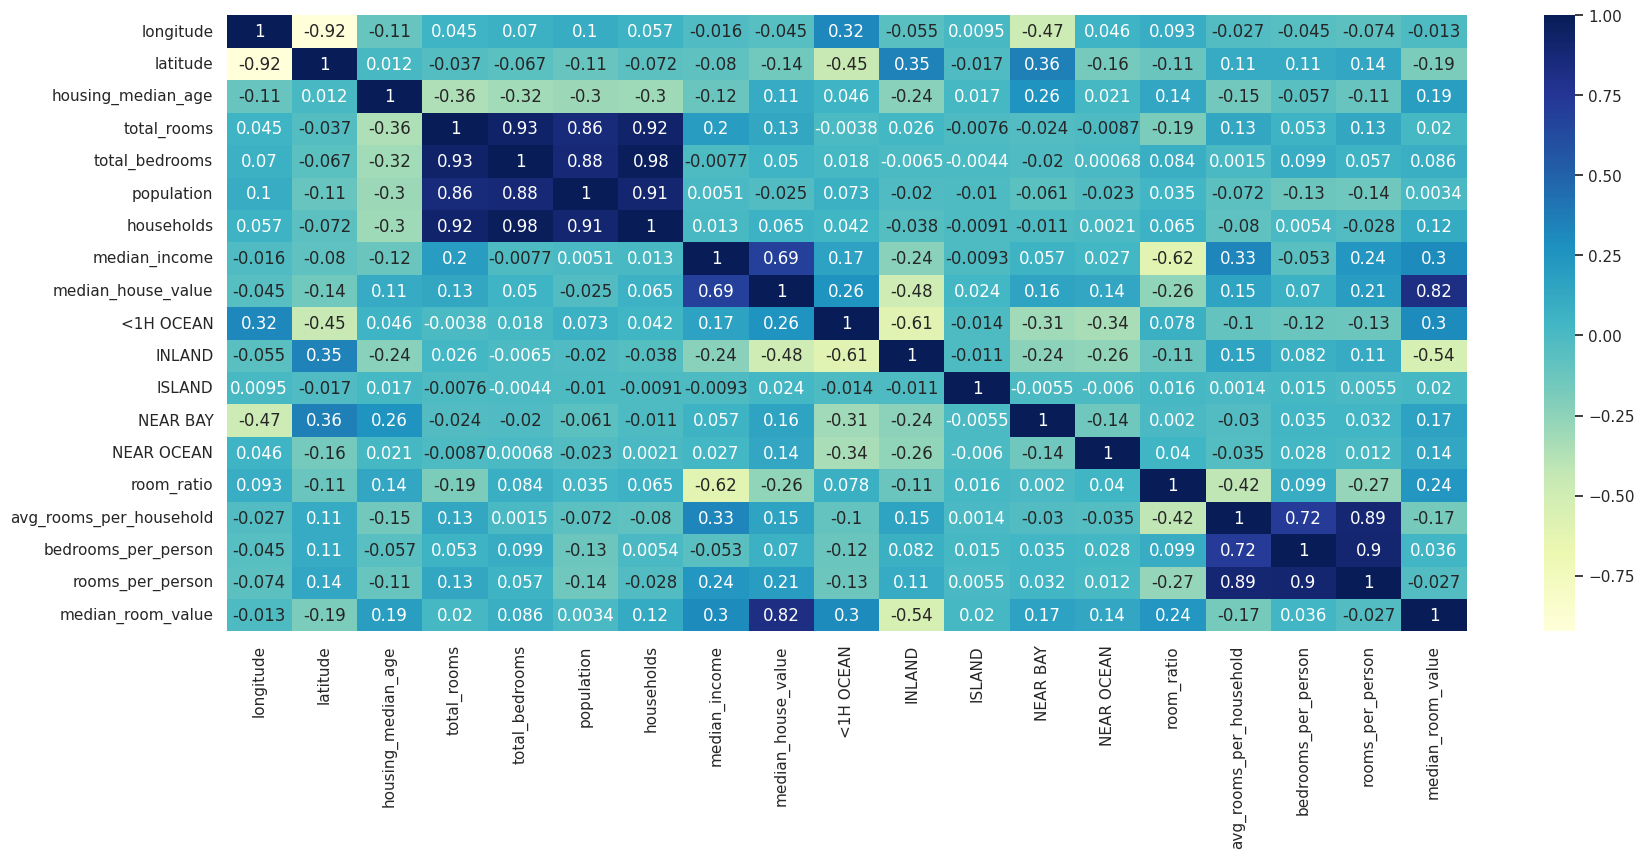

In [1819]:

sb.set(rc={'figure.figsize':(20,8)})
sb.heatmap(data=datos_na.corr(), annot=True, cmap='YlGnBu' )

In [1820]:
############################################################ cambios empiezan agregados aqui#########################################################################

In [1821]:
#analisis de los registros que tienen valores tope asignados

In [1822]:
casas_de_500_parriba =datos_na['median_house_value']>=500000.0

datos_na[casas_de_500_parriba].sort_values(by='median_house_value', ascending=False)

# #existen 985 registros con precio de casa promedio fijado al tope

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,room_ratio,avg_rooms_per_household,bedrooms_per_person,rooms_per_person,median_room_value
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,0,0,0,1,0,0.313253,2.929412,0.196970,0.628788,170683.072289
14468,-117.26,32.85,30.0,3652.0,499.0,978.0,462.0,8.2374,500001.0,0,0,0,0,1,0.136637,7.904762,0.510225,3.734151,63253.138554
15500,-117.26,33.09,22.0,2398.0,407.0,349.0,169.0,7.0423,500001.0,0,0,0,0,1,0.169725,14.189349,1.166189,6.871060,35237.768557
15614,-122.41,37.81,25.0,1178.0,545.0,592.0,441.0,3.6728,500001.0,0,0,0,1,0,0.462649,2.671202,0.920608,1.989865,187182.038200
15615,-122.41,37.81,31.0,3991.0,1311.0,2305.0,1201.0,1.8981,500001.0,0,0,0,1,0,0.328489,3.323064,0.568764,1.731453,150463.843899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15712,-122.44,37.79,52.0,1726.0,384.0,614.0,356.0,3.6812,500000.0,0,0,0,1,0,0.222480,4.848315,0.625407,2.811075,103128.621089
15679,-122.43,37.80,52.0,1006.0,251.0,349.0,233.0,3.2235,500000.0,0,0,0,1,0,0.249503,4.317597,0.719198,2.882521,115805.168986
6776,-118.15,34.12,49.0,1789.0,288.0,848.0,311.0,6.0199,500000.0,1,0,0,0,0,0.160984,5.752412,0.339623,2.109670,86920.067077
17276,-119.69,34.41,44.0,1208.0,357.0,603.0,297.0,2.6103,500000.0,1,0,0,0,0,0.295530,4.067340,0.592040,2.003317,122930.463576


In [1823]:
mas_de_50_anios = datos_na['housing_median_age']>49.9

datos_na[mas_de_50_anios].sort_values(by='housing_median_age', ascending=False)

# #hay 1457 casas con mas de 50 anios

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,room_ratio,avg_rooms_per_household,bedrooms_per_person,rooms_per_person,median_room_value
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,0.129516,8.288136,0.383065,2.957661,42482.413088
15642,-122.42,37.80,52.0,1777.0,486.0,932.0,427.0,3.3643,420000.0,0,0,0,1,0,0.273495,4.161593,0.521459,1.906652,100922.903770
15650,-122.41,37.80,52.0,1999.0,642.0,1846.0,620.0,1.9145,225000.0,0,0,0,1,0,0.321161,3.224194,0.347779,1.082882,69784.892446
15649,-122.41,37.79,52.0,2161.0,544.0,904.0,431.0,3.5066,350000.0,0,0,0,1,0,0.251735,5.013921,0.601770,2.390487,69805.645534
15648,-122.41,37.79,52.0,3302.0,869.0,1178.0,727.0,3.3681,500001.0,0,0,0,1,0,0.263174,4.541953,0.737691,2.803056,110085.017262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359,-120.64,40.41,50.0,1741.0,424.0,987.0,383.0,1.5066,59300.0,0,1,0,0,0,0.243538,4.545692,0.429585,1.763931,13045.318782
4123,-118.22,34.14,50.0,3657.0,708.0,1725.0,644.0,5.5456,258100.0,1,0,0,0,0,0.193601,5.678571,0.410435,2.120000,45451.572327
170,-122.25,37.79,50.0,629.0,188.0,742.0,196.0,2.6458,125000.0,0,0,0,1,0,0.298887,3.209184,0.253369,0.847709,38950.715421
4141,-118.19,34.13,50.0,1309.0,302.0,883.0,293.0,3.1287,198000.0,1,0,0,0,0,0.230710,4.467577,0.342016,1.482446,44319.327731


In [1824]:
mas_de_15 = datos_na['median_income']>14.99

datos_na[mas_de_15].sort_values(by='median_income', ascending=False).count()

# #hay 50 casas con ingresos mayores a los 15

longitude                  50
latitude                   50
housing_median_age         50
total_rooms                50
total_bedrooms             50
population                 50
households                 50
median_income              50
median_house_value         50
<1H OCEAN                  50
INLAND                     50
ISLAND                     50
NEAR BAY                   50
NEAR OCEAN                 50
room_ratio                 50
avg_rooms_per_household    50
bedrooms_per_person        50
rooms_per_person           50
median_room_value          50
dtype: int64

In [1825]:
datos_na.count()

longitude                  20433
latitude                   20433
housing_median_age         20433
total_rooms                20433
total_bedrooms             20433
population                 20433
households                 20433
median_income              20433
median_house_value         20433
<1H OCEAN                  20433
INLAND                     20433
ISLAND                     20433
NEAR BAY                   20433
NEAR OCEAN                 20433
room_ratio                 20433
avg_rooms_per_household    20433
bedrooms_per_person        20433
rooms_per_person           20433
median_room_value          20433
dtype: int64

In [1826]:
# datos_na= datos_na.drop(index=datos_na[mas_de_15].index)
# datos_na= datos_na.drop(index=datos_na[casas_de_500_parriba].index)
# datos_na= datos_na.drop(index=datos_na[mas_de_50_anios].index)

#al final el eliminar estos registros hacian que el rendimiento bajase en un 0.4%, algo insignificante pero es un decenso y no un aumento.
#dejo el analisis como evidencia, aunque no haya servido de nada; la clave estaba en agregar nuevas caracteristicas y no en manipular esos limites como se nos fue sugerido!!!


In [1827]:
############################################################ cambios terminan agregados aqui#########################################################################

In [1828]:
# separar las caracteristicas

#caracteristicas de entrada???
X = datos_na.drop(['median_house_value'], axis=1) #eliminar una columna

#la etiqueta de salida o resultado
y = datos_na['median_house_value']

In [1829]:
# separar el conjunto de caracteristicas en datos de prueba y entrenamiento

from sklearn.model_selection import train_test_split

# IMPORTANTE!!

# primero son las caracteristicas de entrada para entrenamiento y prueba
# luego etiquetas de salida para entrenamiento y prueba

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=.1)

In [1830]:
# Escalamiento
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [1831]:
#entrenar el modelo
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo.fit(X_train, y_train) # ocurre el entrenamiento

LinearRegression()

In [1832]:
# reralizar las predicciones

predicciones = modelo.predict(X_test)


In [1833]:


comparativa = { 'predicciones': predicciones, 'Valor original': y_test }

pd.DataFrame(comparativa)

,predicciones,Valor original
19427,244116.404818,175000.0
2227,257285.553964,193500.0
12038,113221.929347,127300.0
11352,151385.814537,156300.0
19703,137596.239628,110700.0
...,...,...
11910,138344.956165,123400.0
20207,247429.606717,229300.0
9835,324481.262095,339100.0
54,97181.913496,87500.0


In [1834]:
print(modelo.score(X_train, y_train))

print(modelo.score(X_test, y_test))



0.9403949304806871
0.9461920550719948


In [1835]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error( y_test, predicciones )

mse = np.sqrt(mse)

mse


26754.698262790047